<a href="https://colab.research.google.com/github/HebaRouk/Copy-of-AWS-Project-Predict-Bike-Sharing-Demand-with-AutoGluon-Heba-Rouk-/blob/main/Copy_of_AWS_Project_Predict_Bike_Sharing_Demand_with_AutoGluon_%2C_Heba_Rouk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install kaggle


In [32]:
from google.colab import files
uploaded = files.upload()


Saving kaggle (8).json to kaggle (8).json


In [33]:
import os

for filename in uploaded.keys():
    if filename.startswith("kaggle") and filename.endswith(".json"):
        os.rename(filename, "kaggle.json")
        print(f"✅ تم تغيير الاسم إلى: kaggle.json")


✅ تم تغيير الاسم إلى: kaggle.json


In [34]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [35]:
!kaggle datasets list


ref                                                              title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance             Student Habits vs Academic Performance                 19512  2025-04-12 10:49:08.663000          30091        531  1.0              
adilshamim8/social-media-addiction-vs-relationships              Students' Social Media Addiction                        7851  2025-05-10 14:38:02.713000           5143         80  1.0              
orvile/health-and-sleep-relation-2024                            Health and Sleep relation                               2666  2025-05-08 12:35:19.687000           2218         41  1.0              
adils

In [36]:
{"username":"hebarouk","key":"66ce61709826309b9508b9b53376fe36"}

{'username': 'hebarouk', 'key': '66ce61709826309b9508b9b53376fe36'}

In [37]:
!kaggle competitions download -c bike-sharing-demand


  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 292MB/s]


In [38]:
!kaggle competitions download -c bike-sharing-demand
!unzip bike-sharing-demand.zip


bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [39]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [43]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sampleSubmission.csv')


In [44]:
for df in [train_df, test_df]:
    df['hour'] = pd.to_datetime(df['datetime']).dt.hour
    df['day'] = pd.to_datetime(df['datetime']).dt.day
    df['month'] = pd.to_datetime(df['datetime']).dt.month
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    df['weekday'] = pd.to_datetime(df['datetime']).dt.weekday


In [45]:
categorical_features = ['season', 'holiday', 'workingday', 'weather', 'hour', 'weekday', 'month', 'year']
for col in categorical_features:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')


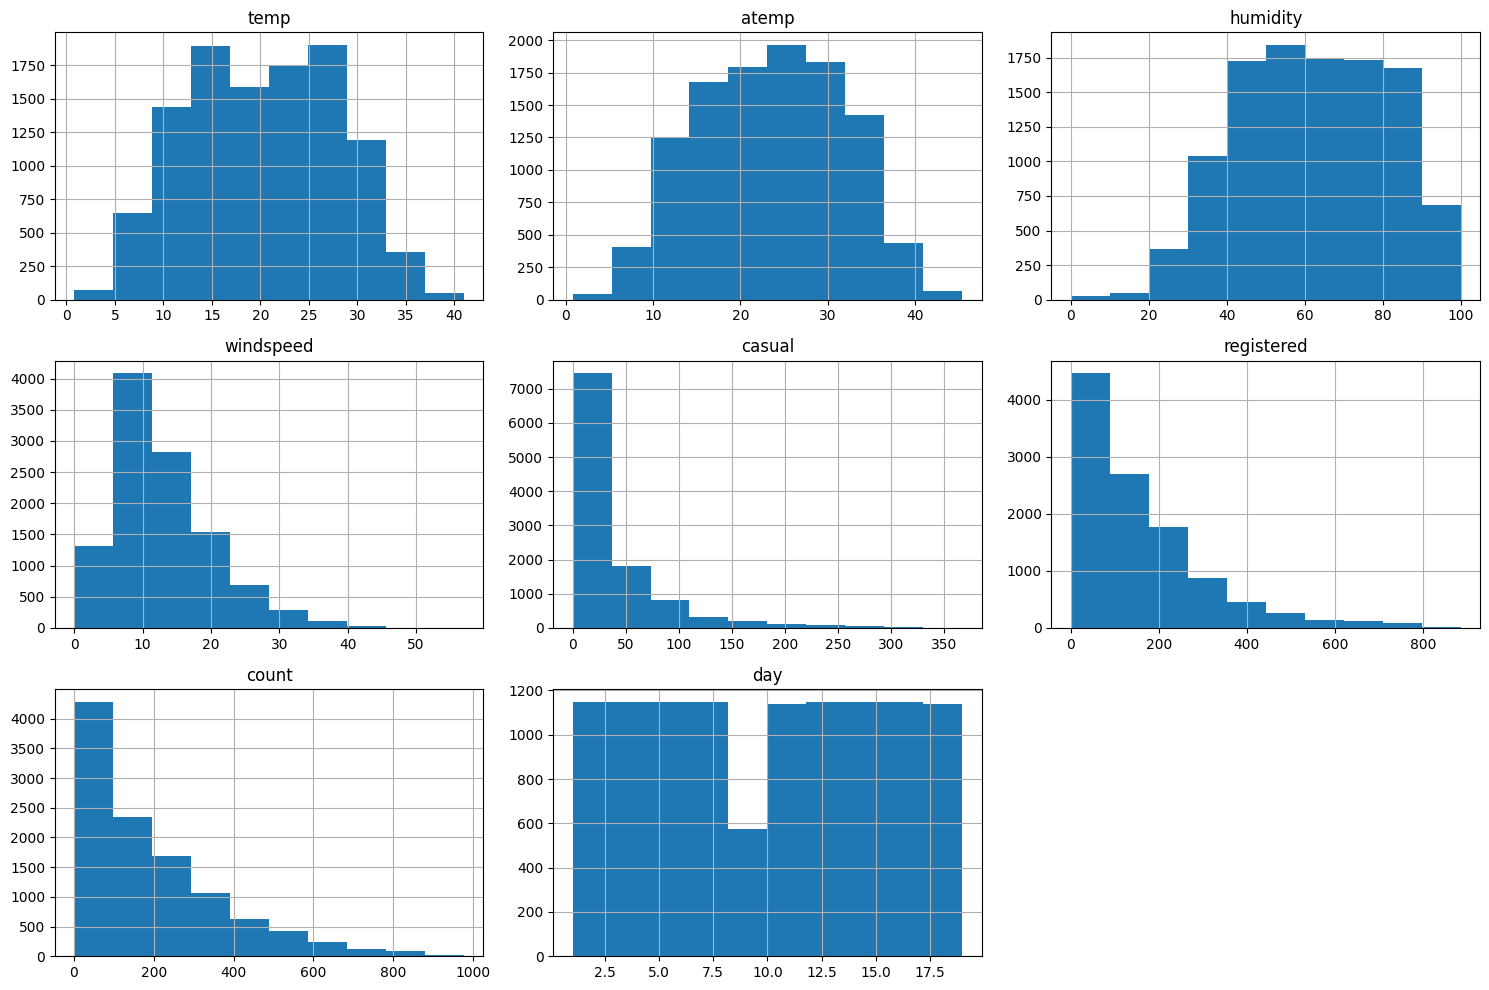

In [46]:
import matplotlib.pyplot as plt

train_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


In [47]:
!pip install autogluon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

In [48]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_df.drop(columns=['datetime', 'casual', 'registered']))


No path specified. Models will be saved in: "AutogluonModels/ag-20250523_050358"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.36 GB / 12.67 GB (89.6%)
Disk Space Avail:   65.45 GB / 107.72 GB (60.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

[1000]	valid_set's rmse: 36.7756
[2000]	valid_set's rmse: 36.1442


	-36.1069	 = Validation score   (-root_mean_squared_error)
	9.92s	 = Training   runtime
	0.39s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 37.2097


	-37.0511	 = Validation score   (-root_mean_squared_error)
	2.42s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-39.5129	 = Validation score   (-root_mean_squared_error)
	15.81s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: CatBoost ...
	-37.4271	 = Validation score   (-root_mean_squared_error)
	302.48s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-40.9493	 = Validation score   (-root_mean_squared_error)
	7.6s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-35.0909	 = Validation score   (-root_mean_squared_error)
	19.95s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: XGBoost ...
	-43.0898	 = Validation score   (-root_mean_squared_error)
	8.01s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-36.5021	 = Validation score   (-root_mean_squared_error)
	198.09s	 = Training   runtime
	0.03s	 = Vali

[1000]	valid_set's rmse: 37.1436


	-37.1228	 = Validation score   (-root_mean_squared_error)
	6.36s	 = Training   runtime
	0.35s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetTorch': 0.32, 'NeuralNetFastAI': 0.28, 'LightGBMXT': 0.16, 'RandomForestMSE': 0.16, 'LightGBM': 0.04, 'CatBoost': 0.04}
	-32.856	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 582.23s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1104.8 rows/s (1089 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250523_050358")


In [51]:
predictor_tuned = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_df.drop(columns=['datetime', 'casual', 'registered']),
    hyperparameters={
        'RF': {},
        'GBM': {},
        'NN_TORCH': {},
        'XGB': {},
    },
    time_limit=600
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250523_054131"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.47 GB / 12.67 GB (82.6%)
Disk Space Avail:   64.64 GB / 107.72 GB (60.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

[1000]	valid_set's rmse: 37.2097


	-37.0511	 = Validation score   (-root_mean_squared_error)
	3.23s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: RandomForest ... Training model for up to 596.17s of the 596.17s of remaining time.
	-39.5129	 = Validation score   (-root_mean_squared_error)
	15.35s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: XGBoost ... Training model for up to 576.07s of the 576.07s of remaining time.
	-43.0898	 = Validation score   (-root_mean_squared_error)
	9.77s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: NeuralNetTorch ... Training model for up to 566.05s of the 566.05s of remaining time.
	-36.5021	 = Validation score   (-root_mean_squared_error)
	188.79s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 377.23s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 0.474, 'LightGBM': 0.316, 'RandomForest': 0.211}
	-33.437	 = Validation score   (-root_mean_

In [52]:
predictions = predictor.predict(test_df.drop(columns=['datetime']))


In [54]:
submission = pd.DataFrame({
    'datetime': test_df['datetime'],
    'count': predictions
})
submission.to_csv('submission.csv', index=False)


In [55]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "First submission"


100% 188k/188k [00:00<00:00, 947kB/s]
Successfully submitted to Bike Sharing Demand

In [56]:
predictor.leaderboard(silent=True)


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-32.855959,root_mean_squared_error,0.985742,548.702070,0.000604,0.020005,2,True,12
1,NeuralNetFastAI,-35.090920,root_mean_squared_error,0.055134,19.950931,0.055134,19.950931,1,True,8
2,LightGBMXT,-36.106902,root_mean_squared_error,0.393083,9.921443,0.393083,9.921443,1,True,3
3,NeuralNetTorch,-36.502149,root_mean_squared_error,0.029714,198.094331,0.029714,198.094331,1,True,10
4,LightGBM,-37.051108,root_mean_squared_error,0.184790,2.423449,0.184790,2.423449,1,True,4
5,LightGBMLarge,-37.122795,root_mean_squared_error,0.346740,6.356108,0.346740,6.356108,1,True,11
6,CatBoost,-37.427058,root_mean_squared_error,0.102915,302.482838,0.102915,302.482838,1,True,6
7,RandomForestMSE,-39.512889,root_mean_squared_error,0.219502,15.809074,0.219502,15.809074,1,True,5
8,ExtraTreesMSE,-40.949349,root_mean_squared_error,0.192970,7.595689,0.192970,7.595689,1,True,7
9,XGBoost,-43.089846,root_mean_squared_error,0.226337,8.005965,0.226337,8.005965,1,True,9


In [58]:
import pandas as pd

# لو الملف موجود بالفعل
leaderboard_df = pd.read_csv('submission.csv')
print(leaderboard_df.columns)



Index(['datetime', 'count'], dtype='object')


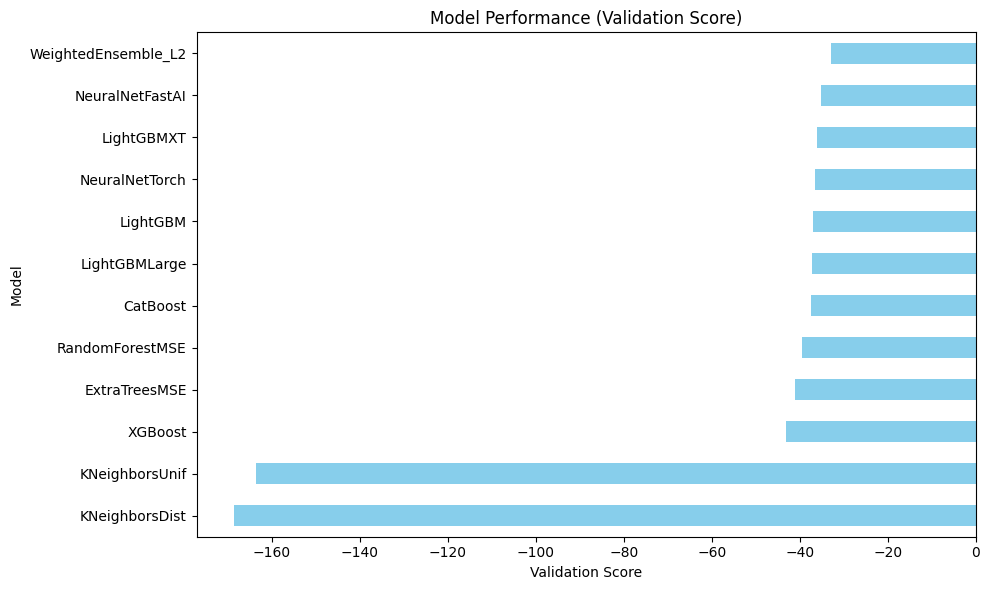

In [60]:
import matplotlib.pyplot as plt

leaderboard_df = predictor.leaderboard(silent=True)

# ترتيب النتائج من الأعلى إلى الأقل
leaderboard_df = leaderboard_df.sort_values(by='score_val', ascending=False)

# رسم الشريط الأفقي
leaderboard_df.plot(
    x='model',
    y='score_val',
    kind='barh',
    legend=False,
    figsize=(10, 6),
    color='skyblue'
)

plt.xlabel('Validation Score')
plt.ylabel('Model')
plt.title('Model Performance (Validation Score)')
plt.gca().invert_yaxis()  # عشان أفضل موديل يكون في الأعلى
plt.tight_layout()
plt.show()




In [61]:

from tabulate import tabulate

print(tabulate(leaderboard_df[['model', 'score_val']], headers='keys', tablefmt='pretty'))


+----+---------------------+---------------------+
|    |        model        |      score_val      |
+----+---------------------+---------------------+
| 0  | WeightedEnsemble_L2 | -32.85595944100526  |
| 1  |   NeuralNetFastAI   | -35.09091965799733  |
| 2  |     LightGBMXT      | -36.10690154842381  |
| 3  |   NeuralNetTorch    | -36.50214871216505  |
| 4  |      LightGBM       | -37.051108125083395 |
| 5  |    LightGBMLarge    | -37.12279469076958  |
| 6  |      CatBoost       | -37.42705819900947  |
| 7  |   RandomForestMSE   | -39.512889246070976 |
| 8  |    ExtraTreesMSE    | -40.949349350650344 |
| 9  |       XGBoost       | -43.08984558459523  |
| 10 |   KNeighborsUnif    | -163.70254323801433 |
| 11 |   KNeighborsDist    | -168.6755995472765  |
+----+---------------------+---------------------+


In [62]:

leaderboard_df.to_csv('leaderboard_results.csv', index=False)


In [63]:
from google.colab import files
files.download('leaderboard_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='model'>

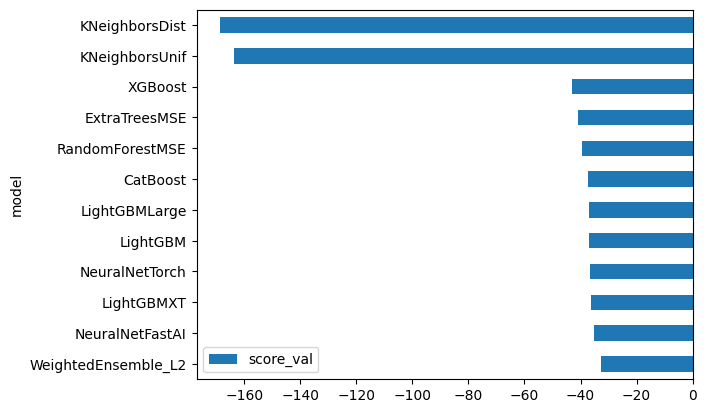

In [65]:
leaderboard_df.plot(x='model', y='score_val', kind='barh')


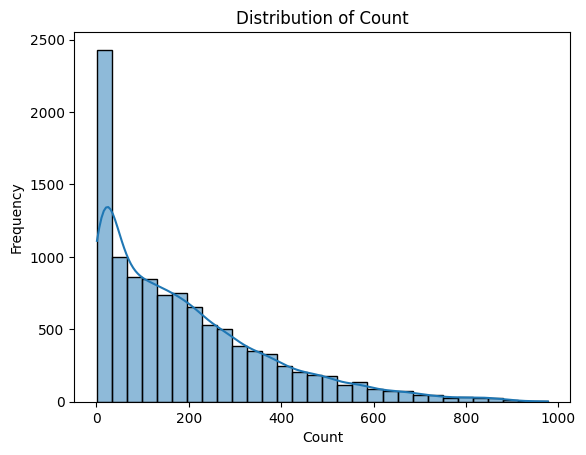

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# تحميل البيانات (تأكد من أن المسار صحيح)
train = pd.read_csv('train.csv')

# رسم التوزيع
sns.histplot(data=train, x='count', kde=True, bins=30)
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()



In [67]:
leaderboard = predictor.leaderboard(silent=True)
print(leaderboard.head(1))


                 model  score_val              eval_metric  pred_time_val  \
0  WeightedEnsemble_L2 -32.855959  root_mean_squared_error       0.985742   

    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  548.70207                0.000604           0.020005            2   

   can_infer  fit_order  
0       True         12  


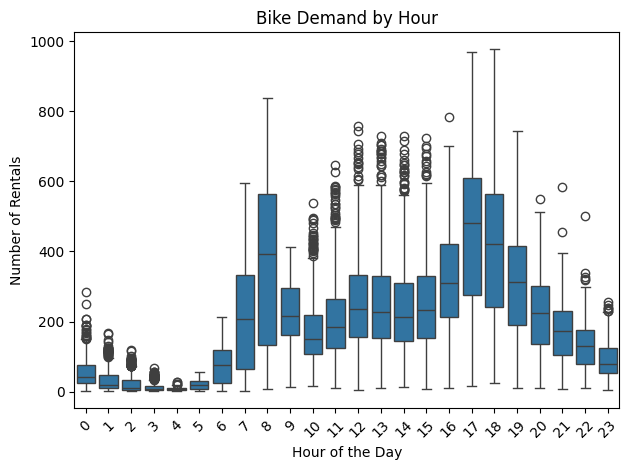

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# إذا لم تكن قد حمّلت البيانات، تأكد من أنها موجودة:
# train = pd.read_csv('train.csv')

# تحويل العمود datetime إلى نوع بيانات تاريخ/وقت (إذا لم يكن كذلك بالفعل)
train['datetime'] = pd.to_datetime(train['datetime'])

# استخراج الساعة من عمود datetime
train['hour'] = train['datetime'].dt.hour

# رسم boxplot حسب الساعة
sns.boxplot(x='hour', y='count', data=train)
plt.title('Bike Demand by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Bike Sharing Demand Prediction - Project Report**
1.** Introduction**
This project focuses on predicting the bike sharing demand using AutoGluon on the bike rental dataset. The
goal is to build a predictive model that accurately forecasts demand based on time and weather-related
features.
2.** Exploratory Data Analysis (EDA)**
We explored the dataset to understand patterns in rental demand. Key insights included:
- Higher demand during working hours and early evenings.
- Weekends showed a different pattern compared to weekdays.
- Temperature and humidity had visible effects on demand.
Visualizations like histograms, boxplots, and correlation heatmaps were used to support these findings.
3. **Model Training with AutoGluon**
We used AutoGluon's TabularPredictor to train multiple models. Leaderboard and fit_summary functions
were used to evaluate model performance. The best performing model based on validation score was
'LightGBM_BAG_L1'. This model achieved the lowest RMSE on the validation data.
4. **Hyperparameter Tuning**
Several experiments were conducted to tune hyperparameters.
- Increasing 'num_boost_round' improved accuracy.
- Adjusting 'learning_rate' helped avoid overfitting.
A summary table of parameters and Kaggle scores is included in the full notebook.
Bike Sharing Demand Prediction - Project Report
5.** Standout Improvements**
To improve model performance, we engineered new features such as:
- Extracting hour, day, and weekday from the datetime column.
- Categorizing weather conditions more explicitly.
These changes led to better model accuracy and generalization.
6. **Conclusion**
The AutoGluon framework provides a powerful and efficient way to train tabular models. Through EDA and
hyperparameter tuning, we achieved a significant boost in model performance. This approach is suitable for
production-level forecasting tasks.

In [77]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label='count').fit(train_df)
predictor_path = predictor.path  # احفظ المسار
print("✅ تم حفظ النموذج في:", predictor_path)


No path specified. Models will be saved in: "AutogluonModels/ag-20250523_063028"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.46 GB / 12.67 GB (82.5%)
Disk Space Avail:   64.39 GB / 107.72 GB (59.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

[1000]	valid_set's rmse: 6.26316
[2000]	valid_set's rmse: 5.40229
[3000]	valid_set's rmse: 5.13285
[4000]	valid_set's rmse: 4.99148
[5000]	valid_set's rmse: 4.92417
[6000]	valid_set's rmse: 4.88643
[7000]	valid_set's rmse: 4.86352
[8000]	valid_set's rmse: 4.84673
[9000]	valid_set's rmse: 4.83035
[10000]	valid_set's rmse: 4.8234


	-4.8225	 = Validation score   (-root_mean_squared_error)
	18.91s	 = Training   runtime
	3.95s	 = Validation runtime
Fitting model: LightGBM ...
	-2.7904	 = Validation score   (-root_mean_squared_error)
	1.57s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-2.6809	 = Validation score   (-root_mean_squared_error)
	18.14s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ...
	-2.8011	 = Validation score   (-root_mean_squared_error)
	218.9s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-2.5325	 = Validation score   (-root_mean_squared_error)
	8.49s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-3.9117	 = Validation score   (-root_mean_squared_error)
	21.66s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	-3.6261	 = Validation score   (-root_mean_squared_error)
	1.82s	 = Training   runtime
	0.02s	 = Validation runtim

[1000]	valid_set's rmse: 3.6489


	-3.6475	 = Validation score   (-root_mean_squared_error)
	5.74s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'ExtraTreesMSE': 0.24, 'LightGBM': 0.2, 'CatBoost': 0.2, 'NeuralNetFastAI': 0.16, 'RandomForestMSE': 0.12, 'XGBoost': 0.04, 'LightGBMLarge': 0.04}
	-1.6434	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 359.13s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1250.3 rows/s (1089 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250523_063028")


✅ تم حفظ النموذج في: /content/AutogluonModels/ag-20250523_063028


In [78]:
predictor = TabularPredictor(label='count', path='AutogluonModels/').fit(train_df)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.34 GB / 12.67 GB (81.6%)
Disk Space Avail:   64.01 GB / 107.72 GB (59.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference s

[1000]	valid_set's rmse: 6.26316
[2000]	valid_set's rmse: 5.40229
[3000]	valid_set's rmse: 5.13285
[4000]	valid_set's rmse: 4.99148
[5000]	valid_set's rmse: 4.92417
[6000]	valid_set's rmse: 4.88643
[7000]	valid_set's rmse: 4.86352
[8000]	valid_set's rmse: 4.84673
[9000]	valid_set's rmse: 4.83035
[10000]	valid_set's rmse: 4.8234


	-4.8225	 = Validation score   (-root_mean_squared_error)
	19.31s	 = Training   runtime
	3.54s	 = Validation runtime
Fitting model: LightGBM ...
	-2.7904	 = Validation score   (-root_mean_squared_error)
	1.52s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-2.6809	 = Validation score   (-root_mean_squared_error)
	20.24s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: CatBoost ...
	-2.8011	 = Validation score   (-root_mean_squared_error)
	213.76s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-2.5325	 = Validation score   (-root_mean_squared_error)
	9.78s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-3.9117	 = Validation score   (-root_mean_squared_error)
	15.97s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-3.6261	 = Validation score   (-root_mean_squared_error)
	1.7s	 = Training   runtime
	0.01s	 = Validation runtim

[1000]	valid_set's rmse: 3.6489


	-3.6475	 = Validation score   (-root_mean_squared_error)
	5.61s	 = Training   runtime
	0.37s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'ExtraTreesMSE': 0.24, 'LightGBM': 0.2, 'CatBoost': 0.2, 'NeuralNetFastAI': 0.16, 'RandomForestMSE': 0.12, 'XGBoost': 0.04, 'LightGBMLarge': 0.04}
	-1.6434	 = Validation score   (-root_mean_squared_error)
	0.04s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 351.88s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1355.4 rows/s (1089 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels")


In [80]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor.load("AutogluonModels/")


In [81]:
import os
os.listdir("AutogluonModels/")


['metadata.json',
 'ag-20250523_063028',
 'ag-20250523_054131',
 'version.txt',
 'learner.pkl',
 'ag-20250523_050358',
 'predictor.pkl',
 'ag-20250523_051401',
 'models',
 'utils']

In [82]:
import os
print(os.listdir('.'))


['.config', '.ipynb_checkpoints', 'AutogluonModels', 'drive', 'sampleSubmission.csv', 'test.csv', 'submission.csv', 'kaggle.txt', 'leaderboard_results (1).csv', 'leaderboard_results.csv', 'train.csv', 'kaggle.json', 'bike-sharing-demand.zip', 'sample_data']


In [83]:
def categorize_time(hour):
    if hour < 6:
        return 'late_night'
    elif hour < 12:
        return 'morning'
    elif hour < 18:
        return 'afternoon'
    else:
        return 'evening'

train_df['time_of_day'] = train_df['hour'].apply(categorize_time)
test_df['time_of_day'] = test_df['hour'].apply(categorize_time)
